<a href="https://colab.research.google.com/github/LesyaLuck/nlp-homeworks/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
import bz2
import sys

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
with bz2.open("/content/gdrive/My Drive/banki_responses.json.bz2", 'rt', encoding='utf-8') as f:
  json_df = pd.read_json(f, lines=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201030 entries, 0 to 201029
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                185492 non-null  object        
 1   rating_not_checked  201030 non-null  bool          
 2   title               201030 non-null  object        
 3   num_comments        201030 non-null  int64         
 4   bank_license        201026 non-null  object        
 5   author              201009 non-null  object        
 6   bank_name           201030 non-null  object        
 7   datetime            201030 non-null  datetime64[ns]
 8   text                201030 non-null  object        
 9   rating_grade        136189 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 14.0+ MB


In [5]:
json_df.head() #сам отзыв в поле text, имя банка bank_name

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Воронеж,True,Ипотека на 5+,0,лицензия № 1623,e.novikova,ВТБ 24,2015-06-08 11:06:56,Здравствуйте! Хотелось бы выразить благодарно...,5.0
1,г. Казань,True,ЗВОНКИ СОСЕДЯМ,0,лицензия № 2289,KZN\Vorontsova_NA,Русский Стандарт,2015-06-06 18:17:52,Уважаемые представители департамента по работе...,2.0
2,г. Санкт-Петербург,True,Ложная информация!!!!,0,лицензия № 2307,Evgenia15,Союз,2015-06-07 19:08:33,Здравствуйте. Столкнулась с такой ситуацией. в...,2.0
3,г. Москва,True,Банкомат не зачислил деньги на счет,1,лицензия № 2557,dolgov.work,Ситибанк,2015-06-07 19:22:00,1 июня 2015 в Москве в отделении по адресу Смо...,1.0
4,г. Волгоград,True,Невозможно закрыть карту 2(два)!!!,0,лицензия № 3354,copLine,Ренессанс Кредит,2015-06-08 14:54:55,История очень долгая! Пришел я в банк (это раз...,1.0


Часть 1. Анализ текстов

1. Посчитайте количество отзывов в разных городах и на разные банки

In [6]:
json_df.city.value_counts() #заметно, что город был произвольным полем, поэтому какого-то единства написания субъектов РФ здесь мы не наблюдаем

г. Москва                                73715
г. Санкт-Петербург                       18614
г. Екатеринбург                           3211
г. Новосибирск                            3081
г. Нижний Новгород                        2596
                                         ...  
г. Москва/Хабаровск                          1
г. ст.советская                              1
г. Сочи, Краснодар, Туапсе                   1
г. Североуральск Свердловской области        1
г. Краснодарский край, ст.Павловская         1
Name: city, Length: 7151, dtype: int64

In [7]:
json_df.bank_name.value_counts()  #с названием банка ситуация получше, наименования будто из списка

Сбербанк России            30977
Альфа-Банк                 13651
Русский Стандарт           10952
ВТБ 24                     10556
Хоум Кредит Банк           10130
                           ...  
Ипотека-Инвест                 1
Держава                        1
Банк на Красных Воротах        1
Ураллига                       1
Каспий                         1
Name: bank_name, Length: 733, dtype: int64

2. Постройте гистограмы длин слов в символах и в словах

In [8]:
import re
import gensim
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  
# Convert to list
data = json_df.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['здравствуите', 'хотелось', 'бы', 'выразить', 'благодарность', 'банку', 'втб', 'воронеж', 'пл', 'ленина', 'непосредственно', 'специалисту', 'по', 'ипотечному', 'кредитованию', 'мещеряковои', 'юлии', 'анатольевне', 'это', 'уже', 'моя', 'вторая', 'ипотека', 'этом', 'банке', 'этого', 'специалиста', 'вопросов', 'подачеи', 'документов', 'не', 'было', 'быстрое', 'принятие', 'решения', 'об', 'одобрении', 'всеи', 'необходимои', 'суммы', 'никаких', 'проблем', 'выдачеи', 'кредита', 'удобно', 'что', 'никуда', 'не', 'нужно', 'ходить', 'со', 'сторонними', 'организациями', 'не', 'нужно', 'договариваться', 'на', 'оценку', 'сотрудники', 'банка', 'приехали', 'вовремя', 'страховку', 'оформили', 'перед', 'выдачеи', 'кредита', 'отделении', 'банка', 'все', 'быстро', 'четко', 'слаженно', 'на', 'все', 'мои', 'вопросы', 'сравнении', 'условии', 'юлия', 'подробно', 'отвечала', 'что', 'сомнении', 'никаких', 'не', 'возникло', 'каком', 'именно', 'банке', 'брать', 'был', 'выбор', 'между', 'сбербанком', 'втб', 'из

In [9]:
tokens = []
for group in data_words:
    tokens.extend(group)

In [10]:
from collections import Counter
c = Counter(tokens)

In [11]:
import operator
sorted_tuple = sorted(c.items(), key=operator.itemgetter(1), reverse=True)
sort_tokens = dict(sorted_tuple)

In [12]:
sort_tokens_50 = {}
for key, value in list(sort_tokens.items())[:50]:
    sort_tokens_50[key] = value

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'не'),
  Text(1, 0, 'на'),
  Text(2, 0, 'что'),
  Text(3, 0, 'по'),
  Text(4, 0, 'мне'),
  Text(5, 0, 'банка'),
  Text(6, 0, 'банк'),
  Text(7, 0, 'как'),
  Text(8, 0, 'все'),
  Text(9, 0, 'за'),
  Text(10, 0, 'но'),
  Text(11, 0, 'то'),
  Text(12, 0, 'меня'),
  Text(13, 0, 'это'),
  Text(14, 0, 'так'),
  Text(15, 0, 'деньги'),
  Text(16, 0, 'от'),
  Text(17, 0, 'же'),
  Text(18, 0, 'было'),
  Text(19, 0, 'для'),
  Text(20, 0, 'из'),
  Text(21, 0, 'уже'),
  Text(22, 0, 'через'),
  Text(23, 0, 'карту'),
  Text(24, 0, 'еще'),
  Text(25, 0, 'до'),
  Text(26, 0, 'карты'),
  Text(27, 0, 'при'),
  Text(28, 0, 'только'),
  Text(29, 0, 'кредит'),
  Text(30, 0, 'нет'),
  Text(31, 0, 'если'),
  Te

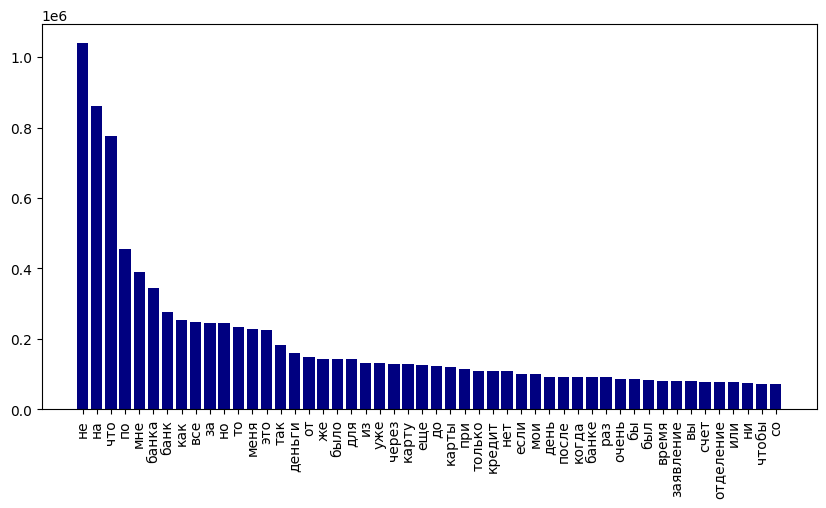

In [13]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,5))
plt.bar(sort_tokens_50.keys(), height = list(sort_tokens_50.values()), color='navy')
plt.xticks(rotation=90)

In [14]:
tokens_len = list(map(len, tokens))

In [ ]:
import matplotlib.ticker as ticker

fig = plt.figure()
ax = fig.add_subplot (111)
ax.hist(tokens_len, bins = list(set(tokens_len)), edgecolor='black') 
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

3. Найдите 10 самых частых слов

In [ ]:
sort_tokens_10 = {}
for key, value in list(sort_tokens.items())[:10]:
    sort_tokens_50[key] = value
    print(f'"{key}" встречается {value} раз')

Найдите 10 самых частых слов без стоп-слов

In [ ]:
from nltk.corpus import stopwords
ru_stopwords = stopwords.words('russian')
def preprocess(tokens):
    return [word
        for word in tokens
            if (word not in ru_stopwords)]

tokens_w_stopwords = preprocess(tokens)

c = Counter(tokens_w_stopwords)
sorted_tuple = sorted(c.items(), key=operator.itemgetter(1), reverse=True)
sort_tokens = dict(sorted_tuple)
sort_tokens_10 = {}
for key, value in list(sort_tokens.items())[:10]:
    sort_tokens_10[key] = value
    print(f'"{key}" встречается {value} раз')

Найдите 10 самых частых лемм

In [ ]:
pip install pymorphy2

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
tokens_lemm = []
ru_stopwords = stopwords.words('russian')

def preprocess(tokens):
    return [word
        for word in tokens
            if (word not in ru_stopwords)]
for key in sort_tokens_50:
    p = morph.parse(key)[0]
    tokens_lemm.append(p.normal_form)
tokens_lemm_10 = list(set(preprocess(tokens_lemm)))[:10]
tokens_lemm_10   

Найдите 10 самых частых существительных

In [ ]:
morph = pymorphy2.MorphAnalyzer()
tokens_noun = []
for key in sort_tokens_50:
    p = morph.parse(key)[0]
    if p.tag.POS=='NOUN':
        tokens_noun.append(p.normal_form)
set(tokens_noun)

4. Постройте кривые Ципфа и Хипса

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

freq_dict = Counter(tokens)

freqs = list(freq_dict.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

In [ ]:
from tqdm import tqdm
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from string import punctuation

cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for index, row in tqdm(json_df.iterrows(), total = len(json_df)):
    tokens = word_tokenize(row['text'])
    cnt.update([token for token in tokens if token not in punctuation])
    n_words.append(len(cnt))
    n_tokens.append(sum(cnt.values()))

In [ ]:
fig, ax = plt.subplots()
ax.plot(n_tokens, n_words)
plt.show()

5. Ответьте на следующие вопросы:

- какое слово встречается чаще, "сотрудник" или "клиент"?
- сколько раз встречается слова "мошенничество" и "доверие"?


In [ ]:
import re #лемматизация всех данных занимает бесконечное время и ресурсы, починить не смогла, поэтому использую стемминг

class Porter:
	PERFECTIVEGROUND =  re.compile(u"((ив|ивши|ившись|ыв|ывши|ывшись)|((?<=[ая])(в|вши|вшись)))$")
	REFLEXIVE = re.compile(u"(с[яь])$")
	ADJECTIVE = re.compile(u"(ее|ие|ые|ое|ими|ыми|ей|ий|ый|ой|ем|им|ым|ом|его|ого|ему|ому|их|ых|ую|юю|ая|яя|ою|ею)$")
	PARTICIPLE = re.compile(u"((ивш|ывш|ующ)|((?<=[ая])(ем|нн|вш|ющ|щ)))$")
	VERB = re.compile(u"((ила|ыла|ена|ейте|уйте|ите|или|ыли|ей|уй|ил|ыл|им|ым|ен|ило|ыло|ено|ят|ует|уют|ит|ыт|ены|ить|ыть|ишь|ую|ю)|((?<=[ая])(ла|на|ете|йте|ли|й|л|ем|н|ло|но|ет|ют|ны|ть|ешь|нно)))$")
	NOUN = re.compile(u"(а|ев|ов|ие|ье|е|иями|ями|ами|еи|ии|и|ией|ей|ой|ий|й|иям|ям|ием|ем|ам|ом|о|у|ах|иях|ях|ы|ь|ию|ью|ю|ия|ья|я)$")
	RVRE = re.compile(u"^(.*?[аеиоуыэюя])(.*)$")
	DERIVATIONAL = re.compile(u".*[^аеиоуыэюя]+[аеиоуыэюя].*ость?$")
	DER = re.compile(u"ость?$")
	SUPERLATIVE = re.compile(u"(ейше|ейш)$")
	I = re.compile(u"и$")
	P = re.compile(u"ь$")
	NN = re.compile(u"нн$")

	def stem(word):
		word = word.lower()
		word = word.replace(u'ё', u'е')
		m = re.match(Porter.RVRE, word)
		if m and m.groups():
			pre = m.group(1)
			rv = m.group(2)
			temp = Porter.PERFECTIVEGROUND.sub('', rv, 1)
			if temp == rv:
				rv = Porter.REFLEXIVE.sub('', rv, 1)
				temp = Porter.ADJECTIVE.sub('', rv, 1)
				if temp != rv:
					rv = temp
					rv = Porter.PARTICIPLE.sub('', rv, 1)
				else:
					temp = Porter.VERB.sub('', rv, 1)
					if temp == rv:
						rv = Porter.NOUN.sub('', rv, 1)
					else:
						rv = temp
			else:
				rv = temp
			
			rv = Porter.I.sub('', rv, 1)

			if re.match(Porter.DERIVATIONAL, rv):
				rv = Porter.DER.sub('', rv, 1)

			temp = Porter.P.sub('', rv, 1)
			if temp == rv:
				rv = Porter.SUPERLATIVE.sub('', rv, 1)
				rv = Porter.NN.sub(u'н', rv, 1)
			else:
				rv = temp
			word = pre+rv
		return word
	stem=staticmethod(stem)

if __name__ == '__main__':
	print(Porter.stem(u'устойчивость'))

In [ ]:
m = Porter()

In [ ]:
import gensim
from nltk.corpus import stopwords
ru_stopwords = stopwords.words('russian')

def preprocess(tokens):
    return [word
        for word in tokens
            if (word not in ru_stopwords)]

def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        sent = preprocess(sent)
        yield(list(map(m.stem,sent)))


dt = json_df
data = dt.text.values.tolist()
data_words_stem = list(sent_to_words(data))

In [ ]:
tokens_stem = []
for group in data_words:
    tokens_stem.extend(group)
c = Counter(tokens_stem)
sorted_tuple = sorted(c.items(), key=operator.itemgetter(1), reverse=True)
sort_tokens_stem = dict(sorted_tuple)
lst = ['сотрудник','клиент','мошенничество','доверие']
lst_stem = list(map(m.stem,lst))
num = []
for i in lst_stem:
    num.append(sort_tokens_stem[i])
print (f'слова {lst} встречаются соответственно {num} раз')

#чаще встречается слово клиент

6. В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру , для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)

In [ ]:
#для рейтинга 5
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,2), stop_words=ru_stopwords, norm=None).fit(dt.query('rating_grade==5').tokens)
array_1 = tfidf_vectorizer.transform(dt.query('rating_grade==5').tokens)
max_value = array_1.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(tfidf_vectorizer.get_feature_names())
feature_names[sorted_by_tfidf[-30:]]

In [ ]:
#для рейтинга 1
tfidf_vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,2), stop_words=ru_stopwords, norm=None).fit(dt.query('rating_grade==1').tokens)
array_1 = tfidf_vectorizer.transform(dt.query('rating_grade==1').tokens)
max_value = array_1.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(tfidf_vectorizer.get_feature_names())
feature_names[sorted_by_tfidf[-30:]]

Часть 2. Тематическое моделирование

Латентно-семантический анализ (LSA, LSI)

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities
from gensim.models import lsimodel

texts = [text.split() for text in dt.tokens]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=30)

In [ ]:
lsi.show_topics(10)

LDA модель

In [ ]:
from gensim.models import ldamodel
%time lda = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

In [ ]:
lda.show_topics(num_topics=8, num_words=5, formatted=False)

In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
corpus=corpus_tfidf
%time vis_data = gensimvis.prepare(lda, corpus, dictionary)

In [ ]:
pyLDAvis.display(vis_data)

Часть 3. Классификация текстов

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

df = dt.query("rating_grade in [1,5]")

x_train, x_test, y_train, y_test = train_test_split(df.tokens, df.rating_grade, stratify = df.rating_grade)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

vec = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

In [ ]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 2))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

In [ ]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))